# LSTM으로 이란 국내총생산 예측 모델

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 문제
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

#오류
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [3]:
# 데이터 로드 (예시 데이터를 데이터프레임으로 변환)
data = {
    'GDP': [1.09592E+11, 1.26879E+11, 1.28627E+11, 1.53545E+11, 1.90043E+11, 2.26452E+11, 2.66299E+11, 3.49882E+11,
            4.12336E+11, 4.16397E+11, 4.86808E+11, 6.26133E+11, 6.44036E+11, 4.92776E+11, 4.60383E+11, 4.08213E+11,
            4.57955E+11, 4.8663E+11, 3.29692E+11, 2.8365E+11, 2.39735E+11, 3.59097E+11],
    'Exchange rate': [1764.856069, 1753.985685, 6907.034456, 8193.887519, 8613.989421, 8963.958907, 9170.942878,
                      9281.151828, 9428.528261, 9864.302456, 10254.17647, 10616.30664, 12175.54722, 18414.44801,
                      25941.66414, 29011.49138, 30914.85244, 33226.29815, 40864.32901, 42000, 42000, 42000],
    'Oil Export': [2096687.025, 1925032.05, 1982781.675, 2262896.775, 2279871.9, 2185511.625, 2256662.7, 2225071.575,
                   2131074.45, 2019443.175, 2102427, 2185425, 1692317.25, 1069966.202, 991951.0274, 1162162.153,
                   1775292.418, 1850537.791, 1394992.791, 530525.7563, 444667.5, 717525],
    'International Reserves': [2858558924, 3664448645, 21419185543, 22035185543, 29553185543, 44127185543, 55511185543,
                               70765185543, 78994185543, 71726185543, 70779185543, 92215185543, 1.04428E+11,
                               1.17603E+11, 1.26166E+11, 1.28399E+11, 1.20733E+11, 1.12593E+11, 1.22473E+11,
                               14888112919, 13689051213, 17678613471]
}

df = pd.DataFrame(data)

In [4]:
# 데이터 전처리
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

In [5]:
# 입력 데이터와 출력 데이터 분리
X = scaled_data[:, 1:]  # 독립 변수들
y = scaled_data[:, 0]   # 종속 변수(GDP)

# 데이터셋 나누기 (90% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train 데이터 중 일부를 validation으로 나누기 (20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [6]:
# LSTM 입력에 맞게 데이터 형태 변환
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [7]:
# LSTM 모델 구축
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 훈련
history = model.fit(X_train, y_train, epochs=55, batch_size=16, validation_data=(X_val, y_val), shuffle=False)


Epoch 1/55
1/1 [==============================] - 7s 7s/step - loss: 0.3357 - val_loss: 0.1733
Epoch 2/55
1/1 [==============================] - 0s 55ms/step - loss: 0.3316 - val_loss: 0.1694
Epoch 3/55
1/1 [==============================] - 0s 48ms/step - loss: 0.3278 - val_loss: 0.1654
Epoch 4/55
1/1 [==============================] - 0s 56ms/step - loss: 0.3166 - val_loss: 0.1615
Epoch 5/55
1/1 [==============================] - 0s 47ms/step - loss: 0.3146 - val_loss: 0.1576
Epoch 6/55
1/1 [==============================] - 0s 52ms/step - loss: 0.3090 - val_loss: 0.1538
Epoch 7/55
1/1 [==============================] - 0s 49ms/step - loss: 0.3012 - val_loss: 0.1499
Epoch 8/55
1/1 [==============================] - 0s 56ms/step - loss: 0.2998 - val_loss: 0.1460
Epoch 9/55
1/1 [==============================] - 0s 49ms/step - loss: 0.2932 - val_loss: 0.1421
Epoch 10/55
1/1 [==============================] - 0s 53ms/step - loss: 0.2842 - val_loss: 0.1382
Epoch 11/55
1/1 [==============

In [8]:
# 모델 평가
loss_test = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss_test}')

loss_val = model.evaluate(X_val, y_val)
print(f'Validation Loss: {loss_val}')

1/1 [==============================] - 0s 36ms/step - loss: 0.0632
Test Loss: 0.0631827861070633
1/1 [==============================] - 0s 38ms/step - loss: 0.0302
Validation Loss: 0.030155040323734283


In [9]:
# 예측 (테스트 데이터)
y_pred_test = model.predict(X_test)

# 예측값 역변환 (스케일 복원)
y_test_inv = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), X_test.reshape(X_test.shape[0], X_test.shape[2])), axis=1))[:, 0]
y_pred_test_inv = scaler.inverse_transform(np.concatenate((y_pred_test, X_test.reshape(X_test.shape[0], X_test.shape[2])), axis=1))[:, 0]

# 예측 (검증 데이터)
y_pred_val = model.predict(X_val)

# 예측값 역변환 (스케일 복원)
y_val_inv = scaler.inverse_transform(np.concatenate((y_val.reshape(-1, 1), X_val.reshape(X_val.shape[0], X_val.shape[2])), axis=1))[:, 0]
y_pred_val_inv = scaler.inverse_transform(np.concatenate((y_pred_val, X_val.reshape(X_val.shape[0], X_val.shape[2])), axis=1))[:, 0]

1/1 [==============================] - 0s 18ms/step


In [10]:
# RMSE 및 R^2 계산 (테스트 데이터)
rmse_test = np.sqrt(mean_squared_error(y_test_inv, y_pred_test_inv))
r2_test = r2_score(y_test_inv, y_pred_test_inv)
print(f'Test RMSE: {rmse_test}')
print(f'Test R^2: {r2_test}')

Test RMSE: 134338826427.77946
Test R^2: 0.29073212848357277


In [11]:
# RMSE 및 R^2 계산 (검증 데이터)
rmse_val = np.sqrt(mean_squared_error(y_val_inv, y_pred_val_inv))
r2_val = r2_score(y_val_inv, y_pred_val_inv)
print(f'Validation RMSE: {rmse_val}')
print(f'Validation R^2: {r2_val}')

Validation RMSE: 92807302850.91306
Validation R^2: 0.2135288610589985


In [12]:
# 결과 출력
print(f'Actual Validation GDP: {y_val_inv}')
print(f'Predicted Validation GDP: {y_pred_val_inv}')

Actual Validation GDP: [2.26452e+11 2.39735e+11 4.86630e+11 2.83650e+11]
Predicted Validation GDP: [3.79605962e+11 3.30374514e+11 4.83496467e+11 3.36293189e+11]


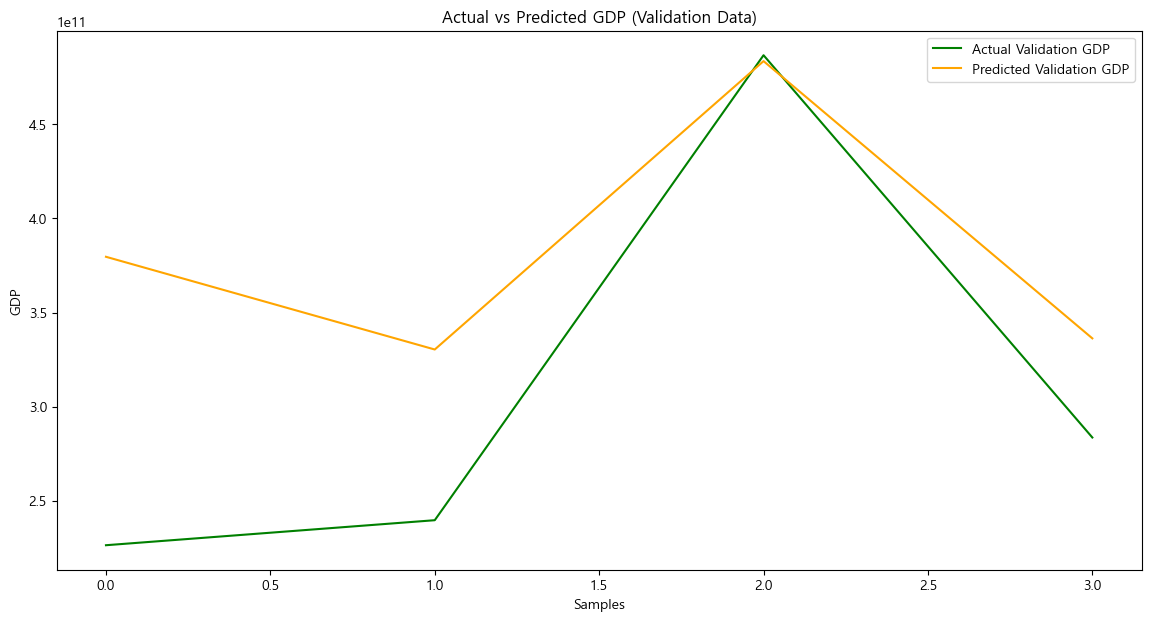

In [13]:
# 예측 결과 시각화 (검증 데이터)
plt.figure(figsize=(14, 7))
plt.plot(y_val_inv, color='green', label='Actual Validation GDP')
plt.plot(y_pred_val_inv, color='orange', label='Predicted Validation GDP')
plt.title('Actual vs Predicted GDP (Validation Data)')
plt.xlabel('Samples')
plt.ylabel('GDP')
plt.legend()
plt.show()

In [14]:
print(f'Actual Test GDP: {y_test_inv}')
print(f'Predicted Test GDP: {y_pred_test_inv}')

Actual Test GDP: [1.09592e+11 4.92776e+11 4.12336e+11 1.26879e+11 4.08213e+11]
Predicted Test GDP: [3.22989951e+11 4.01704205e+11 4.08060302e+11 3.14150348e+11
 4.44448408e+11]


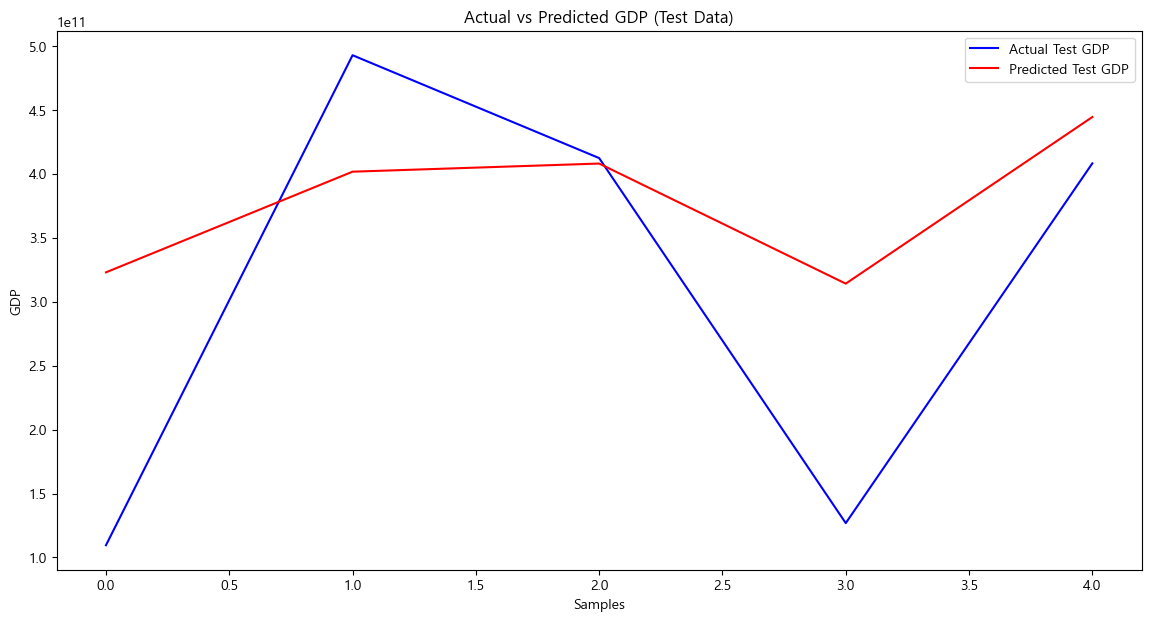

In [15]:
# 예측 결과 시각화 (테스트 데이터)
plt.figure(figsize=(14, 7))
plt.plot(y_test_inv, color='blue', label='Actual Test GDP')
plt.plot(y_pred_test_inv, color='red', label='Predicted Test GDP')
plt.title('Actual vs Predicted GDP (Test Data)')
plt.xlabel('Samples')
plt.ylabel('GDP')
plt.legend()
plt.show()

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 50)             10800     
                                                                 
 dropout (Dropout)           (None, 1, 50)             0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 31,051
Trainable params: 31,051
Non-trainable params: 0
_________________________________________________________________
